In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\Ashutosh\\Documents\\Jupyter Exercises\\Natural Language Processing\\24_Months(CANBK).csv")
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,CANBK,EQ,19-Oct-2018,220.65,220.00,225.70,216.60,221.10,221.00,221.39,6460902,1.430405e+09,49600,279358,4.32
1,CANBK,EQ,22-Oct-2018,221.00,225.00,226.40,209.30,211.50,211.30,216.35,8558472,1.851621e+09,62876,1325609,15.49
2,CANBK,EQ,23-Oct-2018,211.30,208.05,212.20,204.75,208.10,208.10,208.56,6251505,1.303824e+09,48291,544328,8.71
3,CANBK,EQ,24-Oct-2018,208.10,212.50,215.00,205.70,213.85,212.70,210.42,5953674,1.252770e+09,44332,626739,10.53
4,CANBK,EQ,25-Oct-2018,212.70,210.00,214.75,208.00,212.90,211.65,211.22,4714863,9.958693e+08,38059,212893,4.52


In [3]:
df1 = df.reset_index()['High Price']

In [4]:
df1.head()

0    225.70
1    226.40
2    212.20
3    215.00
4    214.75
Name: High Price, dtype: float64

In [5]:
df1.shape

(494,)

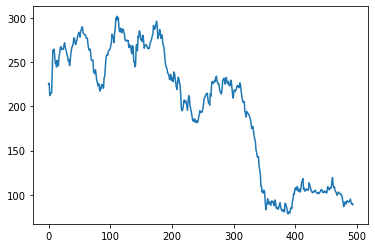

In [6]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [7]:
import numpy as np

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [9]:
df1.shape

(494, 1)

In [10]:
print(df1)

[[0.65862377]
 [0.66175156]
 [0.59830206]
 [0.61081323]
 [0.60969616]
 [0.61438785]
 [0.72252011]
 [0.82841823]
 [0.82640751]
 [0.83355675]
 [0.79937444]
 [0.7613941 ]
 [0.76050045]
 [0.74329759]
 [0.77703307]
 [0.75670241]
 [0.74932976]
 [0.8002681 ]
 [0.80942806]
 [0.84048257]
 [0.84651475]
 [0.83087578]
 [0.83378016]
 [0.83199285]
 [0.83400357]
 [0.85411081]
 [0.86550492]
 [0.84428061]
 [0.82975871]
 [0.82037534]
 [0.80473637]
 [0.7937891 ]
 [0.77345845]
 [0.7792672 ]
 [0.75022341]
 [0.76899017]
 [0.80853441]
 [0.82931189]
 [0.84495085]
 [0.84964254]
 [0.86260054]
 [0.8896336 ]
 [0.88918677]
 [0.86662198]
 [0.85656836]
 [0.87243074]
 [0.87756926]
 [0.89678284]
 [0.90840036]
 [0.91644325]
 [0.91778374]
 [0.89410188]
 [0.92582663]
 [0.93007149]
 [0.94593387]
 [0.94526363]
 [0.91532618]
 [0.91152815]
 [0.90773012]
 [0.90460232]
 [0.90504915]
 [0.88918677]
 [0.89142091]
 [0.88561215]
 [0.85254692]
 [0.83422699]
 [0.82886506]
 [0.83422699]
 [0.82059875]
 [0.78418231]
 [0.77546917]
 [0.77

## Spliting data into train and test

In [11]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:]

## Convert an array of values into a dataset matrix

In [12]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

## Reshape input to be[sample, time_steps, features] which is required for LSTM

In [14]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Create the LSTM Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [16]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 100)          40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Train on 220 samples, validate on 72 samples
Epoch 1/100
220/220 [==============================] - 14s 62ms/sample - loss: 0.2709 - val_loss: 0.0310
Epoch 2/100
220/220 [==============================] - 3s 13ms/sample - loss: 0.0558 - val_loss: 0.0033
Epoch 3/100
220/220 [==============================] - 3s 12ms/sample - loss: 0.0407 - val_loss: 0.0096
Epoch 4/100
220/220 [==============================] - 3s 13ms/sample - loss: 0.0114 - val_loss: 0.0296
Epoch 5/100
220/220 [==============================] - 3s 12ms/sample - loss: 0.0162 - val_loss: 0.0166
Epoch 6/100
220/220 [==============================] - 3s 12ms/sample - loss: 0.0111 - val_loss: 0.0119
Epoch 7/100
220/220 [==============================] - 3s 12ms/sample - loss: 0.0105 - val_loss: 0.0204
Epoch 8/100
220/220 [==============================] - 3s 12ms/sample - loss: 0.0081 - val_loss: 0.0244
Epoch 9/100
220/220 [==============================] - 3s 12ms/sample - loss: 0.0078 - val_loss: 0.0165
Epoch 10/100
220/2

220/220 [==============================] - 3s 12ms/sample - loss: 0.0025 - val_loss: 0.0032
Epoch 79/100
220/220 [==============================] - 3s 12ms/sample - loss: 0.0024 - val_loss: 0.0025
Epoch 80/100
220/220 [==============================] - 3s 12ms/sample - loss: 0.0023 - val_loss: 0.0029
Epoch 81/100
220/220 [==============================] - 3s 12ms/sample - loss: 0.0022 - val_loss: 0.0030
Epoch 82/100
220/220 [==============================] - 3s 12ms/sample - loss: 0.0023 - val_loss: 0.0026
Epoch 83/100
220/220 [==============================] - 3s 12ms/sample - loss: 0.0025 - val_loss: 0.0029
Epoch 84/100
220/220 [==============================] - 3s 12ms/sample - loss: 0.0022 - val_loss: 0.0030
Epoch 85/100
220/220 [==============================] - 3s 12ms/sample - loss: 0.0023 - val_loss: 0.0023
Epoch 86/100
220/220 [==============================] - 3s 12ms/sample - loss: 0.0023 - val_loss: 0.0039
Epoch 87/100
220/220 [==============================] - 3s 12ms/samp

In [19]:
import tensorflow as tf

In [20]:
tf.__version__

'2.1.0'

## Prediction and performance matrix

In [21]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

## Transformback to original form

In [22]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

## Calculate RMSE performance metrics

In [23]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

238.4463379115046

In [24]:
## Test data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

111.42861387356848

## Plotting

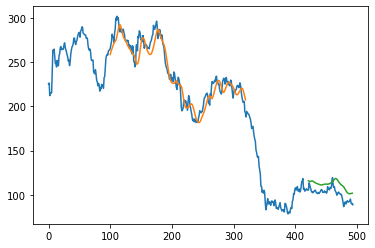

In [25]:
# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [26]:
len(test_data)

173

In [27]:
x_input = test_data[73:].reshape(1, -1)
x_input.shape

(1, 100)

In [28]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.02680965147453085,
 0.06344950848972297,
 0.07305630026809656,
 0.10277033065236818,
 0.10075960679177837,
 0.12444146559428065,
 0.13226094727435217,
 0.12131367292225204,
 0.12287756925826632,
 0.1385165326184093,
 0.11751563896336015,
 0.11483467381590706,
 0.12600536193029493,
 0.11081322609472744,
 0.11483467381590706,
 0.1349419124218052,
 0.1606344950848973,
 0.16733690795353,
 0.17873100983020557,
 0.1253351206434316,
 0.1302502234137623,
 0.11550491510277039,
 0.11706881143878467,
 0.12377122430741738,
 0.12712243074173374,
 0.1210902591599643,
 0.1222073279714031,
 0.12019660411081329,
 0.1572832886505809,
 0.14745308310991956,
 0.13449508489722972,
 0.12444146559428065,
 0.1117068811438785,
 0.11193029490616624,
 0.10679177837354786,
 0.10969615728328863,
 0.11483467381590706,
 0.11706881143878467,
 0.12064343163538876,
 0.11215370866845403,
 0.10723860589812334,
 0.10478105451295805,
 0.1023235031277927,
 0.10880250223413768,
 0.10321715817694377,
 0.10790884718498661,
 

In [30]:
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape(1, n_steps, 1)
        y_hat = model.predict(x_input, verbose = 0)
        print("{} day input {}".format(i, y_hat))
        temp_input.extend(y_hat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(y_hat.tolist())
        i += 1
    else:
        x_input = x_input.reshape(1, n_steps, 1)
        y_hat = model.predict(x_input, verbose = 0)
        print(y_hat[0])
        temp_input.extend(y_hat[0].tolist())
        print(len(temp_input))
        lst_output.extend(y_hat.tolist())
        i += 1
print(lst_output)

0 day input [0.06344951 0.0730563  0.10277033 0.10075961 0.12444147 0.13226095
 0.12131367 0.12287757 0.13851653 0.11751564 0.11483467 0.12600536
 0.11081323 0.11483467 0.13494191 0.1606345  0.16733691 0.17873101
 0.12533512 0.13025022 0.11550492 0.11706881 0.12377122 0.12712243
 0.12109026 0.12220733 0.1201966  0.15728329 0.14745308 0.13449508
 0.12444147 0.11170688 0.11193029 0.10679178 0.10969616 0.11483467
 0.11706881 0.12064343 0.11215371 0.10723861 0.10478105 0.1023235
 0.1088025  0.10321716 0.10790885 0.11148347 0.11930295 0.12310098
 0.12109026 0.10924933 0.1088025  0.10857909 0.11662198 0.11148347
 0.11126005 0.1054513  0.1088025  0.13806971 0.12734584 0.12533512
 0.12153709 0.13382484 0.13181412 0.13114388 0.16800715 0.18386953
 0.14588919 0.1347185  0.13739946 0.11907954 0.11304736 0.10768543
 0.09450402 0.10098302 0.10924933 0.10991957 0.10366399 0.1023235
 0.09830206 0.09919571 0.09226988 0.07618409 0.05987489 0.03753351
 0.04110813 0.05942806 0.0600983  0.05071492 0.06143

9 day input [[0.15144871]]
10 day input [0.11483467 0.12600536 0.11081323 0.11483467 0.13494191 0.1606345
 0.16733691 0.17873101 0.12533512 0.13025022 0.11550492 0.11706881
 0.12377122 0.12712243 0.12109026 0.12220733 0.1201966  0.15728329
 0.14745308 0.13449508 0.12444147 0.11170688 0.11193029 0.10679178
 0.10969616 0.11483467 0.11706881 0.12064343 0.11215371 0.10723861
 0.10478105 0.1023235  0.1088025  0.10321716 0.10790885 0.11148347
 0.11930295 0.12310098 0.12109026 0.10924933 0.1088025  0.10857909
 0.11662198 0.11148347 0.11126005 0.1054513  0.1088025  0.13806971
 0.12734584 0.12533512 0.12153709 0.13382484 0.13181412 0.13114388
 0.16800715 0.18386953 0.14588919 0.1347185  0.13739946 0.11907954
 0.11304736 0.10768543 0.09450402 0.10098302 0.10924933 0.10991957
 0.10366399 0.1023235  0.09830206 0.09919571 0.09226988 0.07618409
 0.05987489 0.03753351 0.04110813 0.05942806 0.0600983  0.05071492
 0.06143878 0.06702413 0.06099196 0.06054513 0.06210903 0.06903485
 0.07506702 0.05563003 

18 day input [[0.20331323]]
19 day input [0.13025022 0.11550492 0.11706881 0.12377122 0.12712243 0.12109026
 0.12220733 0.1201966  0.15728329 0.14745308 0.13449508 0.12444147
 0.11170688 0.11193029 0.10679178 0.10969616 0.11483467 0.11706881
 0.12064343 0.11215371 0.10723861 0.10478105 0.1023235  0.1088025
 0.10321716 0.10790885 0.11148347 0.11930295 0.12310098 0.12109026
 0.10924933 0.1088025  0.10857909 0.11662198 0.11148347 0.11126005
 0.1054513  0.1088025  0.13806971 0.12734584 0.12533512 0.12153709
 0.13382484 0.13181412 0.13114388 0.16800715 0.18386953 0.14588919
 0.1347185  0.13739946 0.11907954 0.11304736 0.10768543 0.09450402
 0.10098302 0.10924933 0.10991957 0.10366399 0.1023235  0.09830206
 0.09919571 0.09226988 0.07618409 0.05987489 0.03753351 0.04110813
 0.05942806 0.0600983  0.05071492 0.06143878 0.06702413 0.06099196
 0.06054513 0.06210903 0.06903485 0.07506702 0.05563003 0.05049151
 0.05294906 0.04647006 0.10451339 0.10500763 0.10699275 0.11042924
 0.11503305 0.12045899

 0.22905642 0.23395666 0.23877583 0.24351484]
27 day input [[0.24817477]]
28 day input [0.14745308 0.13449508 0.12444147 0.11170688 0.11193029 0.10679178
 0.10969616 0.11483467 0.11706881 0.12064343 0.11215371 0.10723861
 0.10478105 0.1023235  0.1088025  0.10321716 0.10790885 0.11148347
 0.11930295 0.12310098 0.12109026 0.10924933 0.1088025  0.10857909
 0.11662198 0.11148347 0.11126005 0.1054513  0.1088025  0.13806971
 0.12734584 0.12533512 0.12153709 0.13382484 0.13181412 0.13114388
 0.16800715 0.18386953 0.14588919 0.1347185  0.13739946 0.11907954
 0.11304736 0.10768543 0.09450402 0.10098302 0.10924933 0.10991957
 0.10366399 0.1023235  0.09830206 0.09919571 0.09226988 0.07618409
 0.05987489 0.03753351 0.04110813 0.05942806 0.0600983  0.05071492
 0.06143878 0.06702413 0.06099196 0.06054513 0.06210903 0.06903485
 0.07506702 0.05563003 0.05049151 0.05294906 0.04647006 0.10451339
 0.10500763 0.10699275 0.11042924 0.11503305 0.12045899 0.12639536
 0.13260043 0.13890663 0.14520897 0.151448

In [31]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [32]:
len(df1)

494

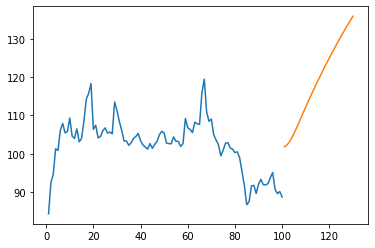

In [33]:
plt.plot(day_new, scaler.inverse_transform(df1[394:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

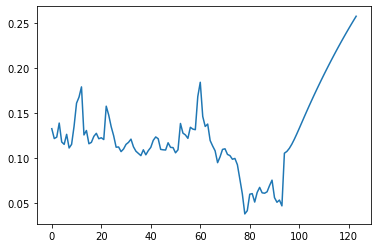

In [37]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[400:])